## Predicting Time to Compromise (TTC) Using Vulnerability Data

In this notebook, we aim to model and predict **Time to Compromise (TTC)** based on various system and security-related features. **Time to Compromise** refers to the estimated time it would take for a malicious actor to successfully breach a system. Accurately predicting TTC is critical for proactive cybersecurity management, enabling organizations to allocate resources efficiently and mitigate risks.

### Features in the Dataset
We simulate a dataset that contains several important variables known to affect system vulnerability and security resilience. The features in the dataset include:

- **Vulnerabilities**: The number of known vulnerabilities in the system, which may increase the likelihood of a successful attack.
- **Patch Delay**: The delay in applying software patches, which can create windows of opportunity for attackers.
- **Access Complexity**: A measure of how complex the system’s access requirements are, which can influence the difficulty of compromising the system.
- **Security Awareness**: A simulated measure of how aware users and administrators are of security best practices (represented as a value between 0 and 1).
- **Patch Complexity**: A measure of how difficult it is to apply patches to the system, which could lead to longer unpatched periods.
- **Firewall Strength**: An ordinal variable representing the strength of the firewall (on a scale of 1 to 5).

### Target: Time to Compromise (TTC)
The **TTC** is computed as a function of these features. Specifically, we use a weighted linear combination of the input features to calculate the TTC and add some noise to reflect real-world unpredictability. This target variable will serve as the output in our predictive modeling efforts.

### Approach
1. **Data Simulation**: We generate a synthetic dataset based on realistic assumptions about how each feature contributes to TTC.
2. **Data Preprocessing**: We split the dataset into training and test sets and scale the features to ensure uniformity.
3. **Modeling**: Various machine learning models will be applied to predict the Time to Compromise, and their performance will be evaluated.

By the end of this notebook, we will have developed a machine learning model that can predict TTC based on a given set of security-related features. The insights derived from this model could potentially guide decision-makers in implementing effective security measures and reducing system exposure.


In [1]:
! pip install seaborn matplotlib pandas numpy scikit-learn tensorflow --quiet


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1.Dataset


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generating synthetic data
np.random.seed(42)
n_samples = 1000

data = pd.read_csv(r"data\time_to_compromise_dataset.csv")



# Split features (X) and target (y)
X = data.drop('TTC', axis=1)
X['ones'] = 1
y = data['TTC'].values.reshape(-1, 1)

# Split the data into training and testing sets without normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling input features (X) and target (y)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit and transform the target data
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


### Note:
In this part, we're generating a **correlation matrix** which calculates the Pearson correlation coefficient between all features, including the target variable.

Pearson correlation is a measure of the linear relationship between two variables, denoted by the formula:

$$
\rho_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$

where $\text{cov}(X, Y)$ is the covariance, and $\sigma_X$, $\sigma_Y$ are the standard deviations of the variables $X$ and $Y$.


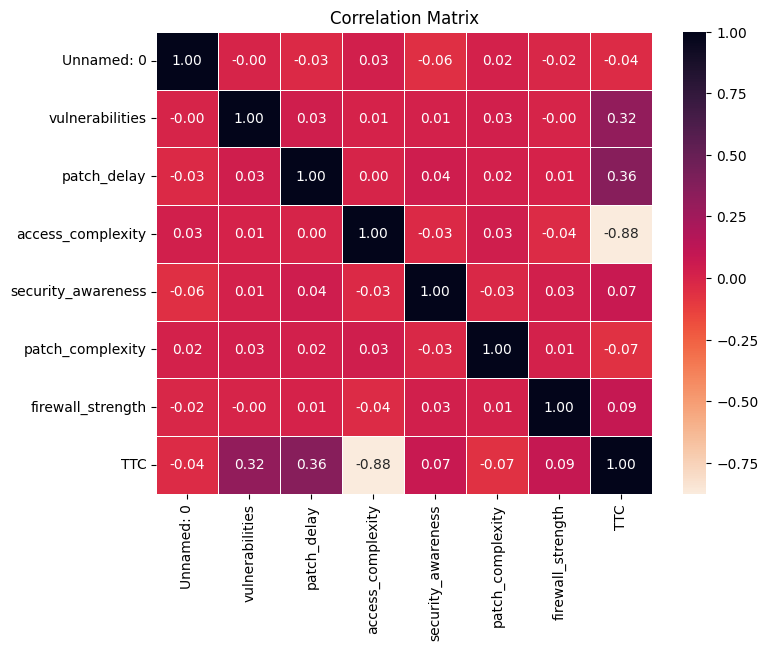

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="rocket_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### Note:
In this section, we are creating scatter plots with **linear regression lines** for each feature (`Vulnerabilities`, `Patch Delay`, `Access Complexity`, `Security Awareness`, `Patch Complexity`, `Firewall Strength`) against the target variable (`Time to Compromise (TTC)`).

A simple linear regression model is given by the equation:

$$
y = w_1 \cdot X_1 + w_2 \cdot X_2 + \dots + w_n \cdot X_n + b
$$

Where:
- $y$ is the predicted target (in this case, TTC).
- $X_1, X_2, \dots, X_n$ are the feature variables (e.g., `Vulnerabilities`, `Patch Delay`, etc.).
- $w_1, w_2, \dots, w_n$ are the weights (coefficients) learned by the model.
- $b$ is the bias (intercept) term.

The **regression line** represents the line of best fit, calculated by minimizing the sum of squared residuals between the actual Time to Compromise (TTC) values and the predicted values on the line.

These plots help us visualize the relationship between each feature and TTC, indicating how changes in each feature are associated with changes in the predicted time it takes for a system to be compromised.


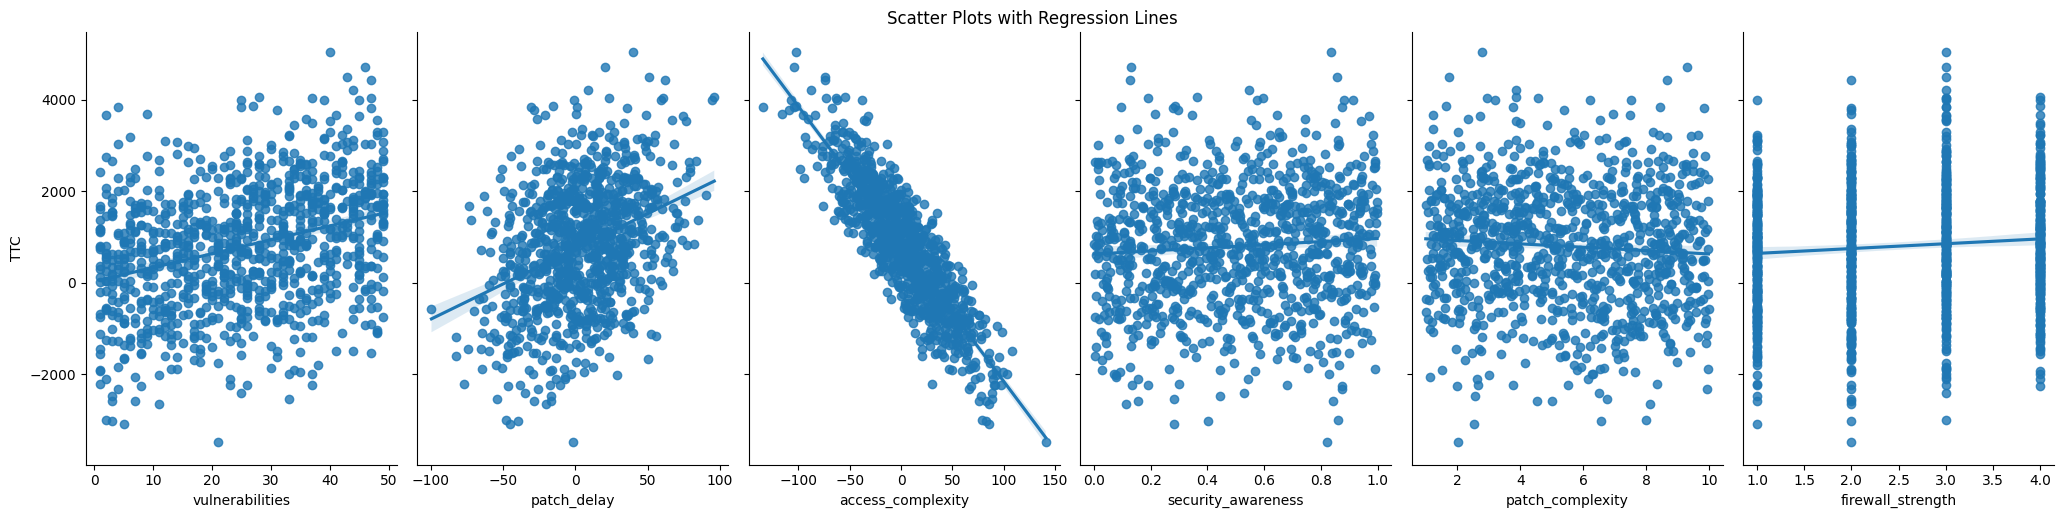

In [31]:
# Scatter plots with regression lines for each feature against the target (Price)
sns.pairplot(data, x_vars=['vulnerabilities', 'patch_delay', 'access_complexity', 'security_awareness', 'patch_complexity', 'firewall_strength'], y_vars='TTC', height=5, kind='reg', aspect=0.7)
plt.suptitle('Scatter Plots with Regression Lines', y=1.02)
plt.show()


### Note:
This section prints basic summary statistics of the dataset, including mean, standard deviation, minimum, maximum, and percentiles (25%, 50%, 75%).

These summary statistics give us insight into the distribution of each variable, such as its central tendency (mean, median) and spread (standard deviation, range).


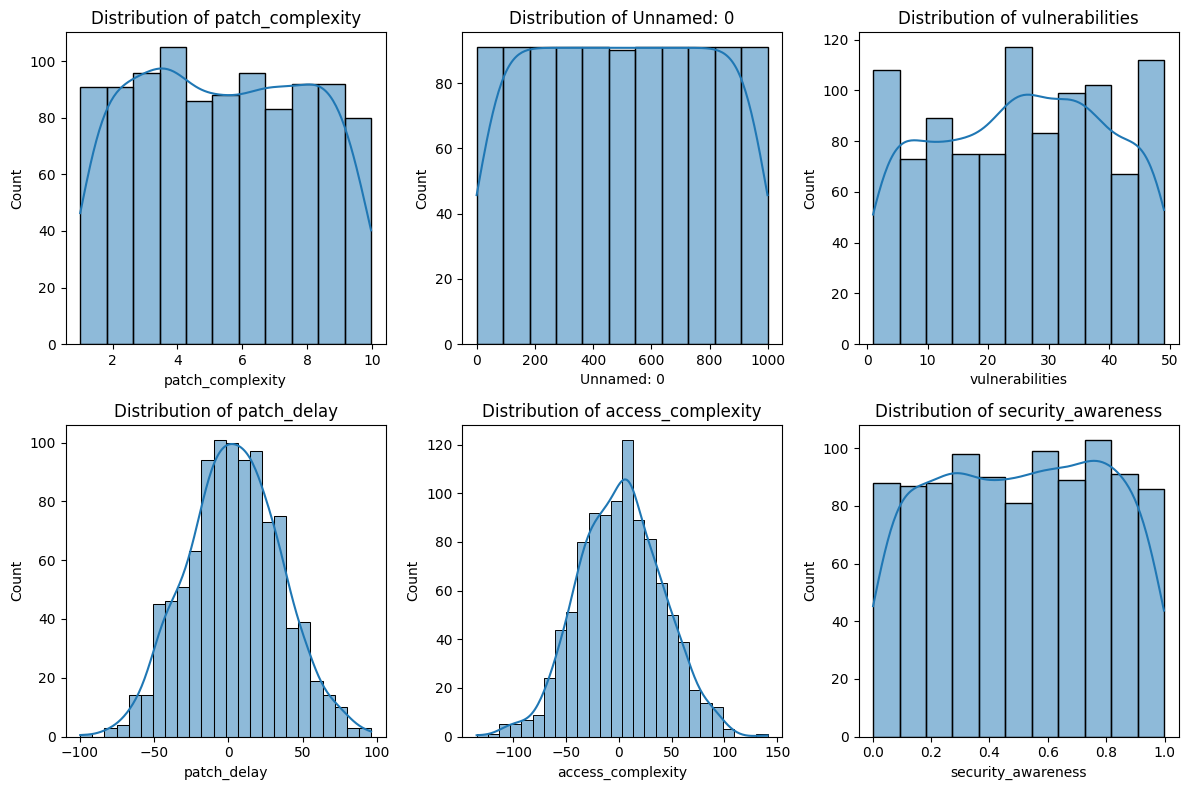

In [32]:
# Plotting distributions of each feature and target
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns, 1):
    if i < 7 : 
        plt.subplot(2, 3, i%6 + 1)
        sns.histplot(data[column], kde=True)
        plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


## 2. Linear Regression Recap

### What is Multivariate Linear Regression?

In **multivariate linear regression**, the relationship between multiple input features $ X_1, X_2, \dots, X_n $ and the target variable $ y $ (TTC) is modeled as:

$
y = w_1 \cdot X_1 + w_2 \cdot X_2 + \dots + w_n \cdot X_n + b
$

Where:
- $ w_1, w_2, \dots, w_n $ are the weights (coefficients) associated with each feature.
- $b $ is the bias (intercept).
- The goal is to find the weights and bias that minimize the error between the predicted house prices and the actual house prices.



## 3. Method 1: Particle Swarm Optimization (PSO) with Exploration Vector for Multivariate Linear Regression

### **How Each Particle is Used to Make a Prediction**:

In the context of multivariate linear regression for predicting **Time to Compromise (TTC)**, each **particle** represents a set of **weights** (or coefficients), including the **bias term**, which are used to make predictions on the dataset.

The prediction for a single data point $X_i$ (where $X_i$ contains all the features for a given system, such as vulnerabilities, patch delay, etc.) is computed as:

$$
\hat{y}_i = w_0 + w_1 \cdot X_{i1} + w_2 \cdot X_{i2} + \dots + w_n \cdot X_{in}
$$

Where:
- $\hat{y}_i$ is the predicted **Time to Compromise (TTC)** for data point $i$.
- $w_0$ is the bias term (intercept).
- $w_1, w_2, \dots, w_n$ are the weights corresponding to the features (like vulnerabilities, patch delay, etc.).
- $X_{i1}, X_{i2}, \dots, $X_{in}$ are the features for system $i$ (e.g., vulnerabilities, patch delay, etc.).

For all systems in the dataset, we can represent this equation in matrix form as:

$$
\hat{y} = X \cdot w
$$

Where:
- $\hat{y}$ is the vector of predicted **Time to Compromise (TTC)** for all data points.
- $X$ is the matrix containing all the features, with an extra column of ones for the bias term.
- $w$ is the vector of weights (including the bias term).

Each particle represents a possible set of weights $w$, and the PSO algorithm tries to optimize these weights to minimize the **Mean Squared Error (MSE)** between the predicted **TTC** values $\hat{y}$ and the actual values $y$.


### **Update Rule with Exploration Vector**:

The PSO algorithm updates the velocity of each particle according to the following modified rule:

$$
v_{i}(t+1) = w \cdot v_{i}(t) + c_1 \cdot r_1 \cdot (p_{i} - x_{i}(t)) + c_2 \cdot r_2 \cdot (g - x_{i}(t)) + \text{exploration vector}
$$

Where:
- $v_{i}(t+1)$ is the updated velocity of particle $i$ at time step $t+1$.
- $w$ is the **inertia weight**, controlling the influence of the previous velocity.
- $c_1$ is the **personal best weight**, which influences the particle to move towards its personal best position.
- $c_2$ is the **global best weight**, which influences the particle to move towards the global best position.
- $r_1$ and $r_2$ are random values between 0 and 1.
- $p_i$ is the personal best position (set of weights) of particle $i$.
- $g$ is the global best position found by the swarm.
- **Exploration Vector**: A random exploration term added to each particle’s velocity to encourage exploration.

### **Impact of the Exploration Vector**:
- **Without the exploration vector**, PSO may quickly converge to a local minimum if all particles are attracted to the same solution. By adding an exploration vector, each particle can explore a new area of the solution space, potentially finding better solutions.
- **With the exploration vector**, the search process becomes more robust, especially in complex optimization landscapes where local minima are prevalent.

The exploration vector encourages particles to explore new regions of the solution space, preventing premature convergence and helping to find better solutions over time.


![Alt Text](https://gbhat.com/assets/gifs/pso_nonconvex.gif)

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# PSO Hyperparameters
num_particles = 30
iterations = 1000
c1 = 1  # Personal best weight
c2 = 2 # Global best weight
w = 0.3  # Inertia weight
exploration_factor = 0.4  # Controls the magnitude of the exploration vector

# Fitness function (Mean Squared Error)
def compute_mse(weights, X, y):
    predictions = X.dot(weights)
    
    # Directly calculate MSE on the raw data
    mse = np.mean((predictions - y.ravel()) ** 2)
    return mse

# Extract features and target
X = X_train_scaled
y = y_train_scaled
m = len(y)

# Initialize particles
particles = np.random.randn(num_particles, X.shape[1]) * 30
velocities = np.random.randn(num_particles, X.shape[1]) * 20

# Initialize personal and global bests
personal_best_positions = np.copy(particles)
personal_best_scores = np.full(num_particles, np.inf)
global_best_position = None
global_best_score = np.inf

# List to store the MSE of the best solution at each iteration (Global Best MSE)
global_mse_history = []

# List to store the MSE of all particles at each iteration (All Particles MSE)
all_particles_mse_history = []

# Initialize delta for fitness change tracking
delta = []

# PSO with Exploration Vector and MSE tracking
for iteration in range(iterations):
    particle_mse = []  # To store the MSE of each particle in this iteration

    for i in range(num_particles):
        # Evaluate the fitness of the particle
        fitness = compute_mse(particles[i], X, y)
        delta.append(global_best_score - fitness)

        # Add the particle's MSE to the list for this iteration
        particle_mse.append(fitness)

        # Update personal best
        if fitness < personal_best_scores[i]:
            personal_best_scores[i] = fitness
            personal_best_positions[i] = particles[i]

        # Update global best
        if fitness < global_best_score:
            global_best_score = fitness
            global_best_position = particles[i]
            # Pretty-print the new best score and the delta
            print(f"Iteration {iteration}: New Best Score! Global Best MSE = {global_best_score:.6f}")
            print(f"Delta: {delta[-1]:.6f}")

    # Track the MSE of the global best position at each iteration
    global_mse_history.append(global_best_score)

    # Track the MSEs of all particles at this iteration
    all_particles_mse_history.append(particle_mse)

    # Update velocity and position for each particle
    for i in range(num_particles):
        # Compute the exploration vector as a small random perturbation
        exploration_vector = exploration_factor * np.random.randn(X.shape[1])

        # Update velocity with exploration vector
        velocities[i] = (w * velocities[i] +
                         c1 * np.random.rand() * (personal_best_positions[i] - particles[i]) +
                         c2 * np.random.rand() * (global_best_position - particles[i]) +
                         exploration_vector)

        # Update the particle's position (weights)
        particles[i] += velocities[i]

# Best solution found by PSO
print("Best weights found by PSO with Exploration Vector:", global_best_position)
print("Best score found by PSO with Exploration Vector:", global_best_score)

# Plotting the MSE history
start_iter = 5
end_iter = len(all_particles_mse_history)
all_particles_mse_history = np.array(all_particles_mse_history[start_iter:])




Iteration 0: New Best Score! Global Best MSE = 4898.888173
Delta: inf
Iteration 0: New Best Score! Global Best MSE = 2331.701868
Delta: 2567.186304
Iteration 0: New Best Score! Global Best MSE = 2004.191179
Delta: 327.510689
Iteration 1: New Best Score! Global Best MSE = 1054.329507
Delta: 949.861672
Iteration 1: New Best Score! Global Best MSE = 910.252385
Delta: 144.077122
Iteration 2: New Best Score! Global Best MSE = 650.947559
Delta: 259.304826
Iteration 2: New Best Score! Global Best MSE = 342.320719
Delta: 308.626840
Iteration 3: New Best Score! Global Best MSE = 91.777649
Delta: 250.543070
Iteration 6: New Best Score! Global Best MSE = 71.904154
Delta: 19.873495
Iteration 7: New Best Score! Global Best MSE = 71.607106
Delta: 0.297048
Iteration 8: New Best Score! Global Best MSE = 50.822839
Delta: 20.784267
Iteration 9: New Best Score! Global Best MSE = 50.471987
Delta: 0.350851
Iteration 9: New Best Score! Global Best MSE = 48.377521
Delta: 2.094466
Iteration 9: New Best Score!

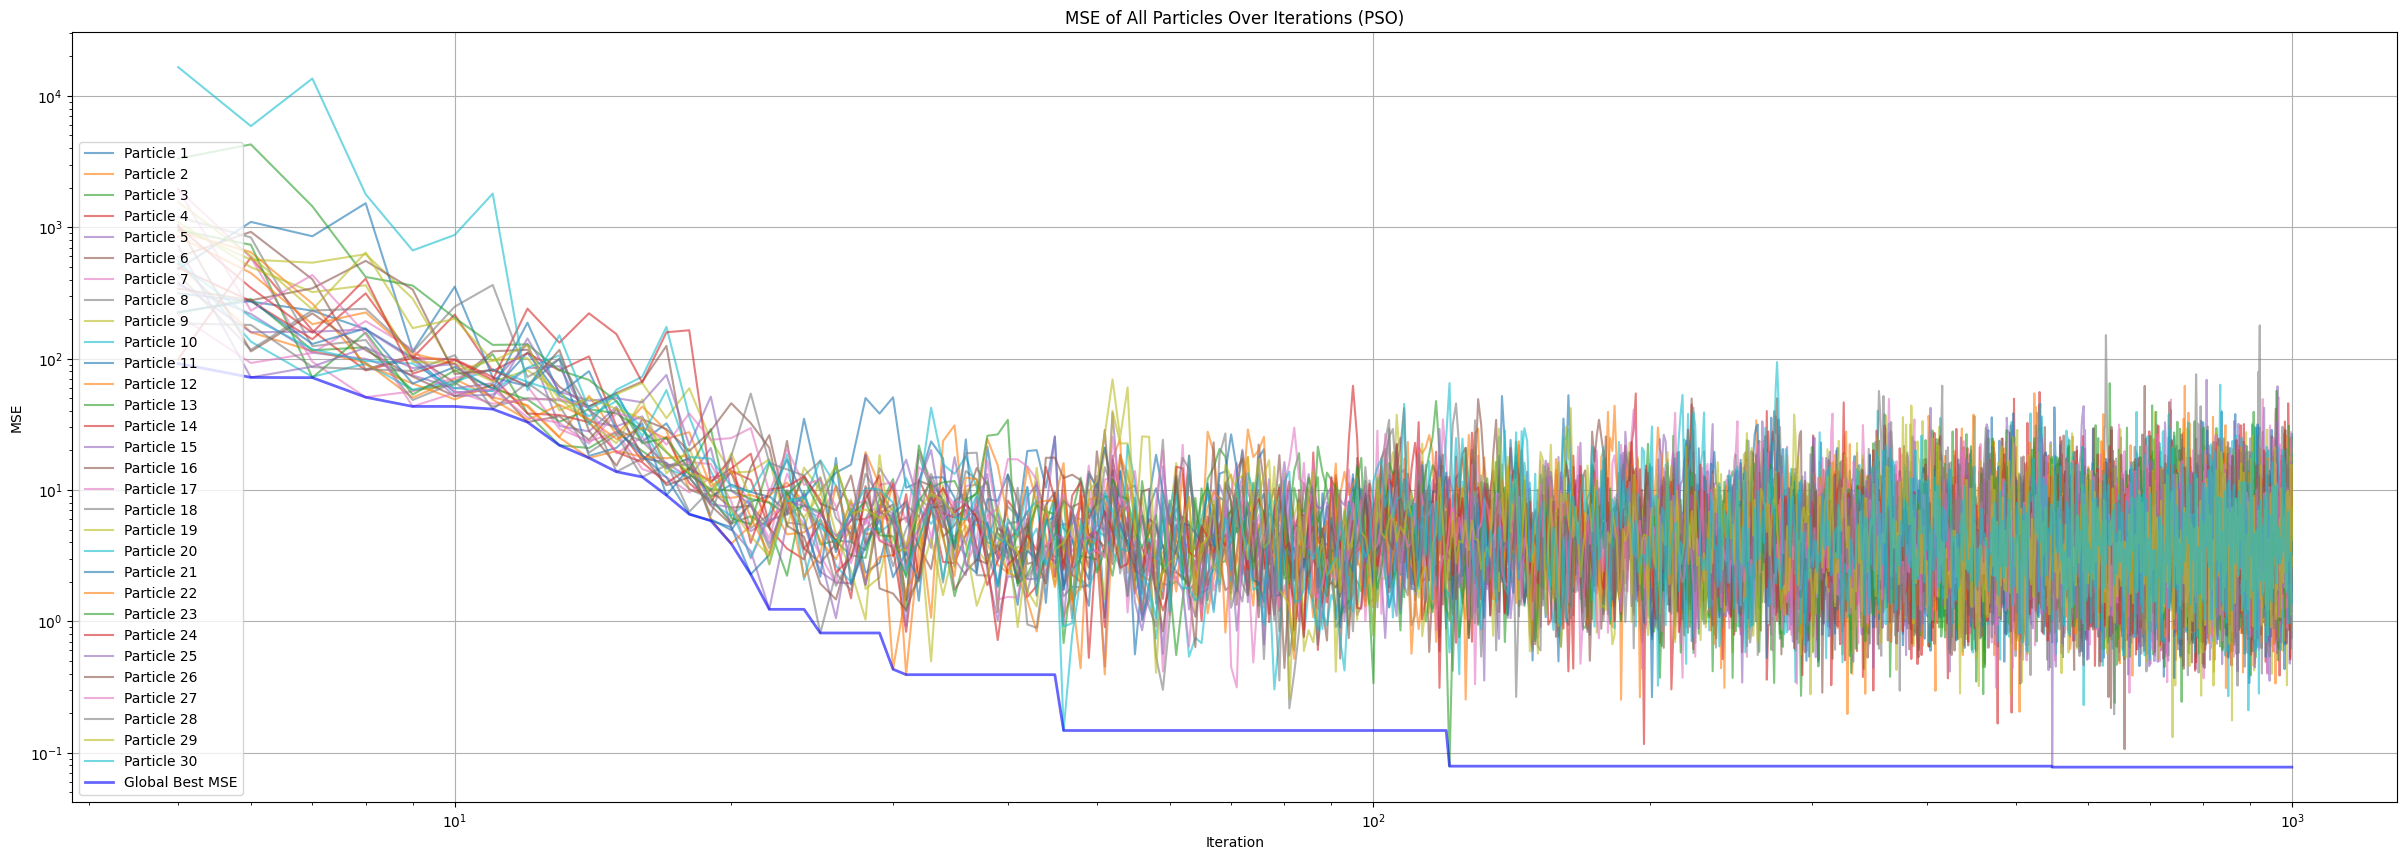

In [34]:
# Convert all particles' MSE history to a NumPy array for easy manipulation

# Plot 2: MSE of All Particles Over Iterations and global MSE
plt.figure(figsize=(30, 10))
for particle_idx in range(num_particles):
    plt.plot(range(start_iter , end_iter) , all_particles_mse_history[:, particle_idx], label=f'Particle {particle_idx+1}', alpha=0.6)
plt.plot(range(start_iter , end_iter), global_mse_history[start_iter : end_iter], label='Global Best MSE', color='blue', linewidth = 2 , alpha = 0.6)

plt.title('MSE of All Particles Over Iterations (PSO)')
plt.xlabel('Iteration')
plt.legend()
plt.ylabel('MSE')
plt.grid(True)
plt.xscale('log')
plt.yscale("log")
plt.show()


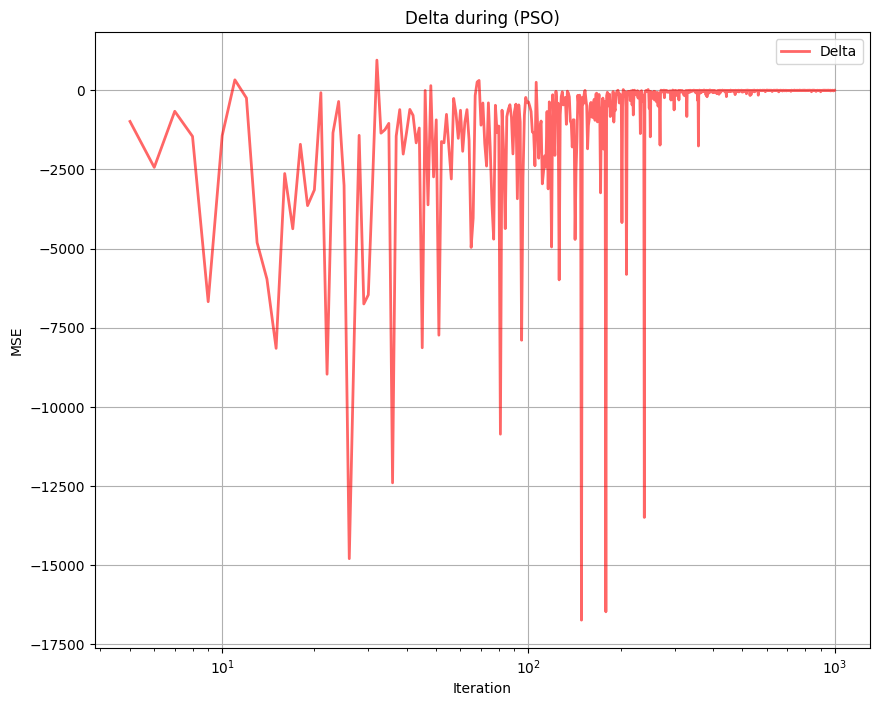

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(range(start_iter , end_iter),delta[start_iter : end_iter], label='Delta', color='red', linewidth = 2 , alpha = 0.6)
plt.title('Delta during (PSO)')
plt.xlabel('Iteration')
plt.legend()
plt.ylabel('MSE')
plt.xscale("log")
plt.grid(True)
plt.show()



## 5. Method 3: Normal Equation

### What is the Normal Equation?

The **Normal Equation** is a direct solution to the linear regression problem. It computes the optimal weights without the need for iterative optimization.

### Formula:
$
\theta = (X^T X)^{-1} X^T y
$

Where:
- $ X $ is the matrix of input features.
- $ y $ is the vector of target values.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train_scaled)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train_scaled, y_train_pred)
linear_model_test_mse = mean_squared_error(y_test_scaled, y_test_pred)

# Print the coefficients (weights) and bias (intercept)
print("Model Coefficients (Weights):", model.coef_)
print("Model Intercept (Bias):", model.intercept_)
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {linear_model_test_mse}")


Model Coefficients (Weights): [[ 1.15303619e-04  3.16368967e-01  3.50286675e-01 -8.83462671e-01
   2.14315627e-02 -5.82903087e-02  5.00876589e-02  0.00000000e+00]]
Model Intercept (Bias): [1.094346e-16]
Training MSE: 4.888427983116832e-06
Test MSE: 5.389724472342854e-06


### Explanation:
- The Normal Equation provides a closed-form solution to the linear regression problem by directly computing the weights that minimize the cost function.

---


## 6. Method 4: Neural Networks (TensorFlow)

### Neural Networks Overview:
![Alt Text](https://www.spotfire.com/content/dam/spotfire/images/graphics/inforgraphics/neutral-network-diagram.svg)

**Neural Networks** are powerful models that can capture both linear and non-linear relationships between features and the target variable. In this example, we will build a simple feedforward neural network using **TensorFlow** to predict house prices.

### Neural Network Structure:
- **Input Layer**: Receives the input features (house size, number of bedrooms, etc.).
- **Hidden Layers**: Adds complexity to the model, allowing it to capture non-linear relationships.
- **Output Layer**: Provides the predicted house price.


![ALt Text](https://media.licdn.com/dms/image/v2/D5612AQE4Qbm-IfchVw/article-inline_image-shrink_400_744/article-inline_image-shrink_400_744/0/1681986754638?e=1733356800&v=beta&t=qnLmynDQgNymvhx_apQCN6gwuBdsnD6ZiudjF7S7Vdc)

In [37]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error



# Custom callback to print metrics every 5 epochs
class PrintEveryNEpoch(tf.keras.callbacks.Callback):
    def __init__(self, n):
        self.n = n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.n == 0:  # Print once every `n` epochs
            print(f"Epoch {epoch+1}, loss: {logs['loss']}, mae: {logs['mae']}, val_loss: {logs['val_loss']}, val_mae: {logs['val_mae']}")

# Build the Neural Network model using TensorFlow (Keras API)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 unit (predicting a single target)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model and use the custom callback to print every 5 epochs
history = model.fit(
    X_train_scaled, y_train_scaled, 
    epochs=800, 
    validation_split=0.2, 
    verbose=0,  # Disable default verbose output
    callbacks=[PrintEveryNEpoch(20)]  # Print only every 5 epochs
)

# Make predictions on the test set
predictions_scaled = model.predict(X_test_scaled)


# Calculate MSE on the rescaled data
nn_mse_rescaled = mean_squared_error(y_test_scaled, predictions_scaled)

# Print the rescaled MSE
print(f"Test MSE (Rescaled): {nn_mse_rescaled:.4f}")


c:\Users\Achref\Desktop\Engineering\IEEE-EniCarthageSB\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 20, loss: 0.00011364130477886647, mae: 0.008267172612249851, val_loss: 0.0002495387161616236, val_mae: 0.012189122848212719
Epoch 40, loss: 0.0030091111548244953, mae: 0.04128281772136688, val_loss: 0.00230213301256299, val_mae: 0.03973281383514404
Epoch 60, loss: 4.893104051006958e-05, mae: 0.005221703089773655, val_loss: 0.0001126065180869773, val_mae: 0.008151543326675892
Epoch 80, loss: 0.0066137006506323814, mae: 0.0618707612156868, val_loss: 0.021649403497576714, val_mae: 0.10880836099386215
Epoch 100, loss: 4.7676130634499714e-05, mae: 0.004845655057579279, val_loss: 8.519997936673462e-05, val_mae: 0.007029807660728693
Epoch 120, loss: 0.0015593525022268295, mae: 0.026253769174218178, val_loss: 0.0017251477111130953, val_mae: 0.03275234252214432
Epoch 140, loss: 0.00016943465743679553, mae: 0.009979416616261005, val_loss: 0.0001337614085059613, val_mae: 0.008790486492216587
Epoch 160, loss: 0.07106870412826538, mae: 0.2090234011411667, val_loss: 0.03518318384885788, val_ma

### Explanation:
- We build a neural network with two hidden layers and train it using the Adam optimizer to minimize Mean Squared Error.
- The model is trained over 100 epochs and evaluated on the test set.


## 7. Comparing the Methods

We will now compare the four methods based on:
- **Explainability**
- **Cost (Computational Complexity)**
- **Performance (MSE and MAE)**

In [38]:
# Compute the final MSE for each method

# MSE for PSO
pso_mse = compute_mse(global_best_position, X_test_scaled, y_test_scaled)
print(f"Final MSE with PSO: {pso_mse}")


# MSE for Normal Equation
print(f"Final MSE with Normal Equation: {linear_model_test_mse}")

# MSE for Neural Networks
print(f"Final MSE with Neural Networks: {nn_mse_rescaled}")

Final MSE with PSO: 2.5367993006385423
Final MSE with Normal Equation: 5.389724472342854e-06
Final MSE with Neural Networks: 0.019163634050168746


## Performance and Cost Analysis of Models

In this section, we compare the three models—**Normal Equation**, **PSO-Optimized Model**, and **Neural Network**—in terms of their performance (measured by MSE) and computational cost (in terms of time and space complexity). The final results of each model are presented below:

### 1. **Normal Equation**:
   - **Performance**: 
     - Final MSE = $5.3897 \times 10^{-6}$ (best performance in terms of MSE).
   - **Time Complexity**: 
     - The normal equation solves the linear regression problem in a closed form: $ \theta = (X^T X)^{-1} X^T y $.
     - The time complexity is **O(n³)** due to matrix inversion, where $n$ is the number of features.
     - Fast for small datasets, but does not scale well to larger feature sets due to matrix inversion.
   - **Space Complexity**:
     - The space complexity is **O(n²)**, where $n$ is the number of features. This is due to the matrix $X^T X$, which grows quadratically with the number of features.
   - **Conclusion**: The normal equation provides excellent accuracy (lowest MSE), but it may not scale efficiently for large datasets with many features due to its cubic time complexity.

### 2. **PSO-Optimized Model**:
   - **Performance**: 
     - Final MSE = 2.5368 (moderate performance).
   - **Time Complexity**:
     - Particle Swarm Optimization (PSO) depends on the number of particles, iterations, and features. The time complexity is **O(p \* t \* n)**, where $p$ is the number of particles, $t$ is the number of iterations, and $n$ is the number of features.
     - Iterative updates of particles make this slower compared to the normal equation.
   - **Space Complexity**:
     - The space complexity is **O(p \* n)**, where $p$ is the number of particles and $n$ is the number of features. Each particle represents a solution vector of length $n$.
   - **Conclusion**: The PSO model strikes a balance between performance and computational cost. Its MSE is higher than the normal equation, but it performs well for more complex tasks, albeit with higher computational overhead compared to simpler methods like the normal equation.

### 3. **Neural Network**:
   - **Performance**: 
     - Final MSE = 0.0192 (best among neural networks but not as low as the normal equation).
   - **Time Complexity**:
     - Neural networks have time complexity **O(m \* n \* k \* e)**, where $m$ is the number of neurons in the layer, $n$ is the number of neurons in the previous layer, $k$ is the number of training examples, and $e$ is the number of epochs.
     - Neural networks tend to be more computationally expensive due to the multiple layers and large number of iterations.
   - **Space Complexity**:
     - The space complexity is **O(m \* n \* k)** for each layer, as the model needs to store the weights and activations for backpropagation.
   - **Conclusion**: While the neural network doesn't outperform the normal equation in terms of MSE, it still provides excellent results and is better suited for complex problems with larger datasets. However, it is the most computationally expensive model.

### Overall Comparison:

| Model               | MSE (Performance)     | Time Complexity         | Space Complexity        | Summary |
|---------------------|-----------------------|-------------------------|-------------------------|---------|
| **Normal Equation**  | $5.3897 \times 10^{-6}$| **O(n³)**                | **O(n²)**                | Best performance in terms of MSE but limited in scalability for larger datasets. |
| **PSO-Optimized**    | 2.5368                | **O(p \* t \* n)**       | **O(p \* n)**            | Moderate performance, computationally expensive but offers a flexible optimization approach. |
| **Neural Network**   | 0.0192                | **O(m \* n \* k \* e)**  | **O(m \* n \* k)**       | Excellent for complex problems, but the most expensive in terms of time and memory usage. |

### Conclusion:

- **Best Performance (MSE)**: Surprisingly, the **Normal Equation** has the best performance in terms of the final MSE ($5.3897 \times 10^{-6}$), which is even better than the neural network. This may be due to the simpler nature of the data or the specific problem, where a linear relationship may have worked exceptionally well.
  
- **Cost-Effective Performance**: The **PSO-Optimized Model** offers a reasonable compromise between performance and computational cost. While its MSE (2.5368) is higher than the other methods, it remains flexible and scalable for more complex scenarios.
  
- **Computational Complexity**: The **Neural Network** is the most computationally expensive model but provides excellent performance (MSE = 0.0192). It is best suited for larger, more complex problems with patterns that simpler models can't capture.

For smaller datasets with simpler relationships, the **Normal Equation** might be the best choice, offering both high performance and low computational cost. However, for larger, more complex datasets, **Neural Networks** or **PSO** would be better suited depending on the available computational resources.
